/tmp/ipykernel_2695/2080732698.py:30: RuntimeWarning: invalid value encountered in scalar power
  mass = (netEnergy ** 2 - netMomentum ** 2) ** 0.5 # Finds the mass with the formula E^2 = p^2 + m^2


Number of events filtered by charge: 0
Number of events filtered by mass: 355771


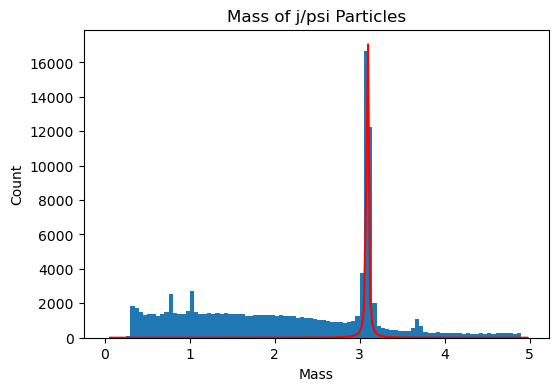

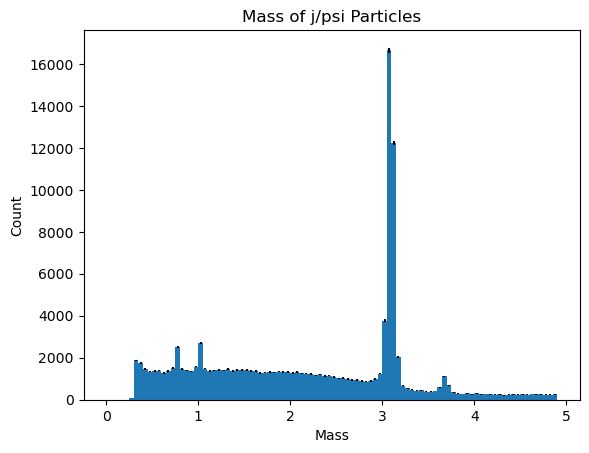

In [15]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import lfilter, savgol_filter

# Load Data
data = pd.read_csv('Double_Muon_Run.csv')

# Defines list + index
massList = []
etas = []
phis = []

charge_epsilon = 0.1
mass_limit = 5
charge_errors = 0
mass_errors = 0

# Loops through each valid trial, finds the momentum and energy of each particle in each of those trails. 
# It the net momentum and energy of both particle and uses the formula E^2 = p^2 + m^2 to find the mass 
for i in range(len(data['Run'])):
    momentum1 = np.array([data['px1'][i], data['py1'][i], data['pz1'][i]]) # Finds momentum of first particle
    momentum2 = np.array([data['px2'][i], data['py2'][i], data['pz2'][i]]) # Finds momentum of second particle

    netMomentum = momentum1 + momentum2 # Adds those momentums into one net momentum array
    netMomentum = np.linalg.norm(netMomentum) # Normalizes the net momentum

    netEnergy = data['E1'][i] + data['E2'][i] # Finds the net energy of both particles 
    mass = (netEnergy ** 2 - netMomentum ** 2) ** 0.5 # Finds the mass with the formula E^2 = p^2 + m^2

    netCharge = data['Q1'][i] + data['Q2'][i]
    if netCharge > charge_epsilon or netCharge < -charge_epsilon:
        charge_errors += 1
        continue
    if mass > mass_limit:
        mass_errors += 1
        continue
    massList.append(mass)
    etas.append(data['eta1'][i]  + data['eta2'][i])
    phis.append(data['phi1'][i]  + data['phi2'][i])

print(f"Number of events filtered by charge: {charge_errors}")
print(f"Number of events filtered by mass: {mass_errors}")

bins_step = 0.05
max_bin = max(massList)
bins = [i * bins_step for i in range(int(max_bin / bins_step))]

xmin = min(massList)
xmax = max(massList)
particle_mass = 3.09 # the x-value of the peak
width = .02 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 110  # a constant that affects the height of the curve, you'll need to tinker with this some

# calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# make the plot
fig, ax = plt.subplots(1,1, figsize=(6,4))
# Plots a histogram of the masses
plt.hist(massList, bins) 
plt.plot(x, y, color='r')  # plots the curve
plt.title("Mass of j/psi Particles") 
plt.xlabel("Mass")
plt.ylabel("Count")
plt.show()

counts, bins, _ = plt.hist(massList, bins) 
bins_eb = [bins[i] + (bins[i + 1] - bins[i])/2 for i in range(len(bins) - 1)]
plt.errorbar(bins_eb, counts, yerr=np.sqrt(counts), fmt='none', color="black")
plt.title("Mass of j/psi Particles") 
plt.xlabel("Mass")
plt.ylabel("Count")
plt.show()


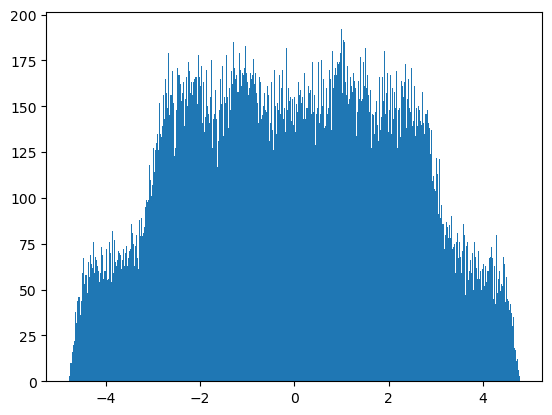

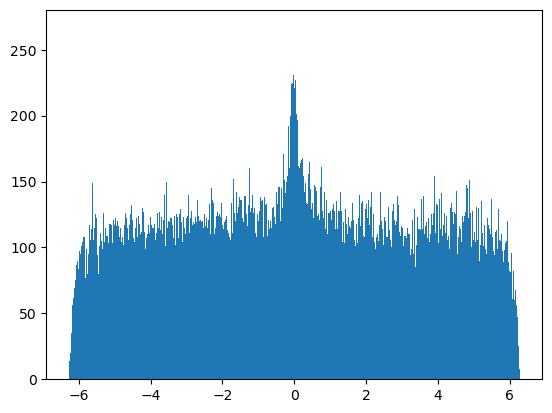

In [16]:
plt.hist(etas, bins=1000)
plt.show()
plt.hist(phis, bins=1000)
plt.show()

In [17]:
max_i = 0
for i in range(len(counts)):
    if counts[i] > counts[max_i]:
        max_i = i
mass = bins_eb[max_i]
print("J/Psi mass estimated from muon decay channel: ", mass)

J/Psi mass estimated from muon decay channel:  3.075


/tmp/ipykernel_2695/2552796783.py:26: RuntimeWarning: invalid value encountered in scalar power
  mass = (netEnergy ** 2 - netMomentum ** 2) ** 0.5 # Finds the mass with the formula E^2 = p^2 + m^2


Number of events filtered by charge: 42947
Number of events filtered by mass: 51732
[2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45]


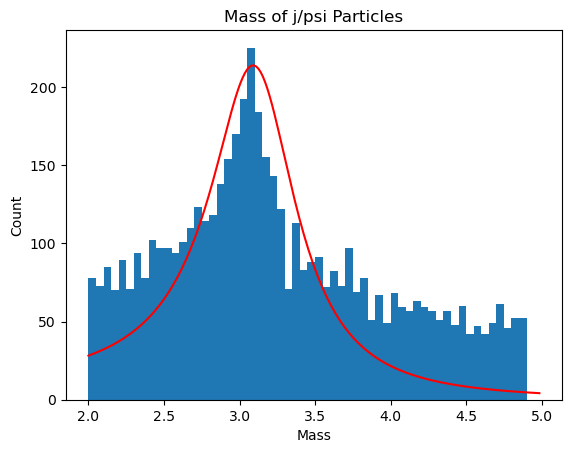

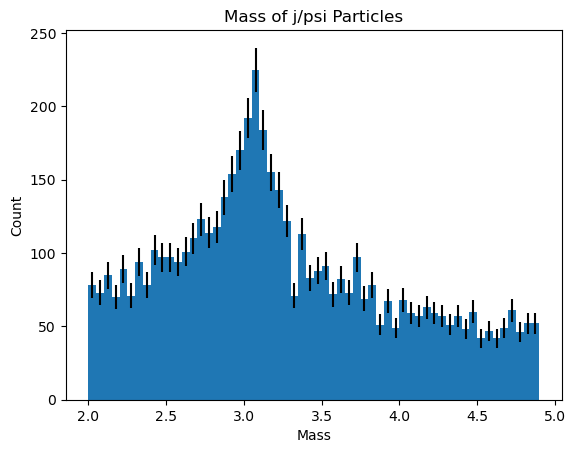

In [18]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Data
data = pd.read_csv('Double_Electron_Run.csv')

# Defines list + index
massList = []
charge_epsilon = 0.1
mass_limit = 5
charge_errors = 0
mass_errors = 0

# Loops through each valid trial, finds the momentum and energy of each particle in each of those trails. 
# It the net momentum and energy of both particle and uses the formula E^2 = p^2 + m^2 to find the mass 
for i in range(len(data['Run'])):
    momentum1 = np.array([data['px1'][i], data['py1'][i], data['pz1'][i]]) # Finds momentum of first particle
    momentum2 = np.array([data['px2'][i], data['py2'][i], data['pz2'][i]]) # Finds momentum of second particle

    netMomentum = momentum1 + momentum2 # Adds those momentums into one net momentum array
    netMomentum = np.linalg.norm(netMomentum) # Normalizes the net momentum

    netEnergy = data['E1'][i] + data['E2'][i] # Finds the net energy of both particles 
    mass = (netEnergy ** 2 - netMomentum ** 2) ** 0.5 # Finds the mass with the formula E^2 = p^2 + m^2

    netCharge = data['Q1'][i] + data['Q2'][i]
    if netCharge > charge_epsilon or netCharge < -charge_epsilon:
        charge_errors += 1
        continue
    if mass > mass_limit:
        mass_errors += 1
        continue
    massList.append(mass)
        

print(f"Number of events filtered by charge: {charge_errors}")
print(f"Number of events filtered by mass: {mass_errors}")

bins_step = 0.05
max_bin = max(massList)
min_bin = 2
bins = [i * bins_step + min_bin for i in range(int((max_bin - min_bin) / bins_step))]
print(bins[:10])

xmin = min_bin
xmax = max_bin
particle_mass = 3.09 # the x-value of the peak
width = .7 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 1000  # a constant that affects the height of the curve, you'll need to tinker with this some
# calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# Plots a histogram of the masses
plt.hist(massList, bins) 
plt.plot(x, y, color='r')  # plots the curve
plt.title("Mass of j/psi Particles") 
plt.xlabel("Mass")
plt.ylabel("Count")
plt.show()

counts, bins, _ = plt.hist(massList, bins) 
bins_eb = [bins[i] + (bins[i + 1] - bins[i])/2 for i in range(len(bins) - 1)]
plt.errorbar(bins_eb, counts, yerr=np.sqrt(counts), fmt='none', color="black")
plt.title("Mass of j/psi Particles") 
plt.xlabel("Mass")
plt.ylabel("Count")
plt.show()



In [19]:
max_i = 0
for i in range(len(counts)):
    if counts[i] > counts[max_i]:
        max_i = i
mass = bins_eb[max_i]
print("J/Psi mass estimated from electron decay channel: ", mass)

J/Psi mass estimated from electron decay channel:  3.075
